# Fine Tuning Transformer for Summary Generation

In [1]:
!pip install transformers -q
!pip install wandb -q

In [2]:
path = 'D:/jupyter_notebook/thesis/'

# Ai허브에서 가져온 데이터를 이용해 데이터 전처리!!

In [3]:
import numpy as np
import pandas as pd
import json

In [4]:
# json 파일 가져오기

with open(path + '논문요약_0206_0.json', 'r', encoding='utf-8') as f:
  json_thesis_0206_0 = json.load(f)

with open(path + '논문요약_0206_1.json', 'r', encoding='utf-8') as f:
  json_thesis_0206_1 = json.load(f)

with open(path + '논문요약_0206_2.json', 'r', encoding='utf-8') as f:
  json_thesis_0206_2 = json.load(f)

with open(path + '논문요약_0220_0.json', 'r', encoding='utf-8') as f:
  json_thesis_0220_0 = json.load(f)

with open(path + '논문요약_0225_5_1.json', 'r', encoding='utf-8') as f:
  json_thesis_0225_5_1 = json.load(f)

with open(path + '논문요약_0225_7_0.json', 'r', encoding='utf-8') as f:
  json_thesis_0225_7_0 = json.load(f)

In [5]:
# json 파일을 DataFrame 형식으로 바꾸기. 자연어 추후 전처리 필요

df_thesis_0206_0 = pd.DataFrame(json_thesis_0206_0['data'])
df_thesis_0206_1 = pd.DataFrame(json_thesis_0206_1['data'])
df_thesis_0206_2 = pd.DataFrame(json_thesis_0206_2['data'])
df_thesis_0220_0 = pd.DataFrame(json_thesis_0220_0['data'])
df_thesis_0225_5_1 = pd.DataFrame(json_thesis_0225_5_1['data'])
df_thesis_0225_7_0 = pd.DataFrame(json_thesis_0225_7_0['data'])

In [6]:
df_thesis_0206_0

,doc_type,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section
0,논문,A201008176694,교직 선택 결정에 대한 후회 감정의 탐색적 해석,2018,ART002387022,사회과학,사범대학부속중등교육연구소,조석훈 /JO SEOG HUN (단독),[{'orginal_text': '본 연구는 경제협력개발기구(Organization...,[{'orginal_text': '한국교총은 ‘교사가 된 것을 후회한다.’는 교사 ...
1,논문,A201008176695,평면 테셀레이션에 대한 대수적 고찰,2018,ART002387017,사회과학,사범대학부속중등교육연구소,정영우 (제1)|||김부윤 /Boo Yoon Kim (교신)|||유현기 (참여)||...,[{'orginal_text': '학교수학에서 다루어지는 테셀레이션에 관한 내용은 ...,"[{'orginal_text': '2015년 8월 18일, 새로운 수학적 발견에 관..."
2,논문,A201008176696,한국사교과서 국정화의 정책변동에 대한 연구,2018,ART002387009,사회과학,사범대학부속중등교육연구소,양림 /RIM YANG (단독),[{'orginal_text': '본 연구는 박근혜 정부에서 추진되었던 한국사교과서...,[{'orginal_text': '정책과정 상 정책변동 이론으로는 전통적으로 합리모...
3,논문,A201008176697,"로봇 활용 SW 교육에서 컴퓨팅사고력 평가: 지필 시험, 비버챌린지, 자기보고식 설...",2018,ART002389353,사회과학,한국교육공학회,노지예 /Jiyae Noh (제1)|||이정민 (교신),[{'orginal_text': '컴퓨팅사고력은 컴퓨팅의 기본적인 개념과 원리를 기...,[{'orginal_text': '현대 사회에서는 복잡한 문제를 해결하기 위하여 논...
4,논문,A201008176698,고등학생의 바른 인성함양을 위한 긍정적 태도 형성프로그램의 효과에 관한 연구,2018,ART002387007,사회과학,사범대학부속중등교육연구소,김창현 /Kim Chang Hyun (단독),[{'orginal_text': '본 연구는 고등학생들의 바른 인성함양을 위한 긍정...,[{'orginal_text': '우리나라 교육정책에서 창의· 인성교육이 교육과정으...
...,...,...,...,...,...,...,...,...,...,...
31995,논문,A201008208692,"저소득층 학생의 학교 적응, 수업 태도, 학업 성취에 대한 사회적 자본의 영향 분석",2017,ART002279065,사회과학,한국교육개발원,"류방란 /Bangran Ryu,김성식",[{'orginal_text': '이 연구는 저소득층 학생의 교육적 취약성과 가능성...,[{'orginal_text': '이 연구는 전국적인 데이터를 활용하여 저소득층 학...
31996,논문,A201008208693,단어의 정서가와 각성가가 우연학습 이후 기억에 미치는 영향,2017,ART002280350,사회과학,한국인지및생물심리학회,"남예은,이윤형",[{'orginal_text': '본 연구의 목적은 단어의 정서적 특성이 어휘판단 ...,[{'orginal_text': '사건에 대한 정서적인 정보는 이와 같은 기억의 처...
31997,논문,A201008208694,수학수업에 대한 초등교사의 인식 조사,2017,ART002280577,사회과학,한국수학교육학회,권성룡,[{'orginal_text': '본 연구는 초등수학수업의 개선을 목표로 초등교사의...,[{'orginal_text': '최근에 이뤄진 몇 차례의 수학과 교육과정 개정 노...
31998,논문,A201008208695,SW영재의 학업탄력성과 자아상태 비교,2017,ART002280639,복합학,한국창의정보문화학회,"이재호 /Lee Jaeho,김동현 /Donghyun Kim",[{'orginal_text': '본 논문은 SW영재의 학업탄력성과 자아상태를 확인...,[{'orginal_text': '2015년 통계청의 아동 청소년 대상 학업 관련 ...


In [7]:
thesis_0206_0 = list()
thesis_0206_1 = list()
thesis_0206_2 = list()
thesis_0220_0 = list()
thesis_0225_5_1 = list()
thesis_0225_7_0 = list()

for e in json_thesis_0206_0['data']:
  thesis_0206_0.append(e['summary_entire'][0])

for e in json_thesis_0206_1['data']:
  thesis_0206_1.append(e['summary_entire'][0])

for e in json_thesis_0206_2['data']:
  thesis_0206_2.append(e['summary_entire'][0])

for e in json_thesis_0220_0['data']:
  thesis_0220_0.append(e['summary_entire'][0])

for e in json_thesis_0225_5_1['data']:
  thesis_0225_5_1.append(e['summary_entire'][0])

for e in json_thesis_0225_7_0['data']:
  thesis_0225_7_0.append(e['summary_entire'][0])

df_thesis_0206_0 = pd.DataFrame(thesis_0206_0)
df_thesis_0206_1 = pd.DataFrame(thesis_0206_1)
df_thesis_0206_2 = pd.DataFrame(thesis_0206_2)
df_thesis_0220_0 = pd.DataFrame(thesis_0220_0)
df_thesis_0225_5_1 = pd.DataFrame(thesis_0225_5_1)
df_thesis_0225_7_0 = pd.DataFrame(thesis_0225_7_0)

#모든 dataframe을 concat으로 합쳐서 df라는 하나의 dataframe으로 만듦
df = pd.concat([df_thesis_0206_0, df_thesis_0206_1, df_thesis_0206_2, df_thesis_0220_0, df_thesis_0225_5_1, df_thesis_0225_7_0])

In [8]:
#orginal_text 길이는 700이상 1000이하로 제한
#summary_text 길이는 150이상 200이하로 제한
#이유
#1. 데이터 길이 분포가 전처리 전보다 고르게 분포하도록 하기 위함
#2. 입력데이터들의 길이가 비슷한것이 모델의 학습효과에도 좋기 때문

df = df[
    (df['orginal_text'].str.len() <= 1000) &
    (df['orginal_text'].str.len() >= 700)
]

df = df[
    (df['summary_text'].str.len() <= 200) &
    (df['summary_text'].str.len() >= 150)
]
df

,orginal_text,summary_text
9,본 연구의 목적은 컴퓨팅 사고력 향상을 위한 SW 교육의 효과성을 메타분석을 통해 ...,본 논문은 컴퓨팅 사고력 향상을 위한 SW 교육의 효과성을 메타분석을 통해 체계적으...
10,"사회불안과 섭식문제는 공병률이 높은 병리인데, 본 연구는 전자가 후자로 옮아가는 과...","사회불안과 섭식문제는 공병률이 높은 병리인데, 본 논문은 전자가 후자로 옮아가는 과..."
16,우리나라에서 SW교육은 21세기 미래 인재 양성을 위한 중요한 교육정책의 하나이다....,"본 논문은 미국, 핀란드, 에스토니아, 영국의 교사교육 사례를 분석하고 이를 통하여..."
23,‘잘 가르치는 일’로서 교육공학은 모종의 처방적인 활동임이 틀림없다. 이 점에서 교...,본 논문은 교육공학의 현상 이면에 보이지 않는 본질을 드러내기 위하여 존재 의미에 ...
32,"노화로 인한 많은 변화 가운데, 특히 신체 건강과 통증은 노인들에게 매우 중요한 문...",본 논문은 최근 심신건강과 관련된 분야에서 주목받고 있는 명상 접근법인 한국형 마음...
...,...,...
31970,"본 연구자는 분석틀에 의해 노랫말의 문학적 요소를 생활주제별, 놀이유형별 소재, 외...","본고는 분석틀에 의하여 노랫말의 문학적 요소를 생활주제별과 놀이유형별 소재, 외적형..."
31989,대법원은 ‘대법원 2017. 2. 16. 선고 2016도13362 전원합의체 판결’...,대법원은 ‘대법원 2017. 2. 16. 선고 2016도13362 전원합의체 판결’...
31992,17세기 조선 양반 사회는 결혼 형태 변화와 함께 젠더 계층화(gender stra...,17세기 조선 양반 사회는 결혼 형태 변화와 함께 젠더 계층화를 시도하는 과정에서 ...
31994,군사법제도를 둘러싼 쟁점 중 가장 중요하고도 본질적인 것은 과연 평시에 특별법원으로...,군사법제도를 둘러싼 쟁점 중 가장 중요하고도 본질적인 것은 과연 평시에 특별법원으로...


Min length :  700
Max length :  1000
Average length :  826


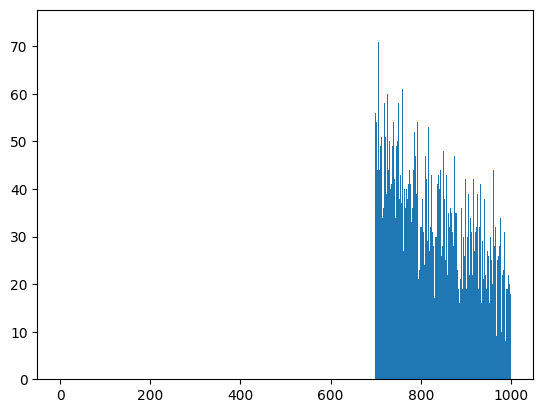

In [9]:
#입력데이터의 길이 분포를 확인하기 위한 코드

import pandas as pd

sentences = df["orginal_text"] #이 때 나오는 그래프는 orginal_text의 길이 분포, 만약 summary_text의 분포를 확인하고 싶다면 summary_text로 바꿔서 길이 분포 확인할 수 있음

import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for s in sentences:
  if len(s) < min_len :
    min_len = len(s)
  if len(s) > max_len :
    max_len = len(s)
  sum_len += len(s)

print('Min length : ', min_len)
print('Max length : ', max_len)
print('Average length : ', sum_len // len(sentences))

sen_length_cnt = [0] * max_len
for sen in sentences:
  sen_length_cnt[len(sen)-1] += 1

plt.bar(range(max_len), sen_length_cnt, width=1.0)
plt.show()

In [10]:
import pandas as pd

#열이름 바꿔줌

df.rename(columns={'orginal_text': 'ctext'}, inplace=True)
df.rename(columns={'summary_text': 'text'}, inplace=True)

# DataFrame을 csv로 저장
df.to_csv('train.csv', index=True, encoding='utf-8')


# 모델 만들기 시작!!!

In [11]:
# Importing stock libraries
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler

# Importing the T5 modules from huggingface/transformers
from transformers import T5Tokenizer, T5ForConditionalGeneration

# WandB – Import the wandb library
import wandb

C:\Users\dnclab\anaconda3\envs\jaesung\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Checking out the GPU 
!nvidia-smi

Sat Jun  3 00:12:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.49       Driver Version: 528.49       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 34%   53C    P8    25W / 370W |    680MiB / 10240MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
# Setting up the device for GPU usage
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [14]:
# Login to wandb to log the model run and all the parameters
!wandb login f2d7cd4fedd2822e534395005a236ac7b01e0036

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\dnclab/.netrc


## 데이터셋 클래스 설정!!

In [15]:
# Creating a custom dataset for reading the dataframe and loading it into the dataloader to pass it to the neural network at a later stage for finetuning the model and to prepare it for predictions

class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, source_len, summ_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.source_len = source_len
        self.summ_len = summ_len
        self.text = self.data.text
        self.ctext = self.data.ctext

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        ctext = str(self.ctext[index])
        ctext = ' '.join(ctext.split())

        text = str(self.text[index])
        text = ' '.join(text.split())

        source = self.tokenizer.batch_encode_plus([ctext], max_length= self.source_len, pad_to_max_length=True,return_tensors='pt')
        target = self.tokenizer.batch_encode_plus([text], max_length= self.summ_len, pad_to_max_length=True,return_tensors='pt')
        
        # 토큰화된 텐서에서 모델에서 제공하는 두개의 키로 분류
        source_ids = source['input_ids'].squeeze()
        source_mask = source['attention_mask'].squeeze()
        target_ids = target['input_ids'].squeeze()
        target_mask = target['attention_mask'].squeeze()
        
        # 딕셔너리 형태로 반환
        return {
            'source_ids': source_ids.to(dtype=torch.long), 
            'source_mask': source_mask.to(dtype=torch.long), 
            'target_ids': target_ids.to(dtype=torch.long),
            'target_ids_y': target_ids.to(dtype=torch.long)
        }

## 훈련함수 정의!!!

In [16]:
# Creating the training function. This will be called in the main function. It is run depending on the epoch value.
# The model is put into train mode and then we wnumerate over the training loader and passed to the defined network 

def train(epoch, tokenizer, model, device, loader, optimizer):
    model.train()# 모델 훈련모드로 설정
    for _,data in enumerate(loader, 0): # enumerate함수를 사용하여 loader를 반복
        y = data['target_ids'].to(device, dtype = torch.long) # Tensor객체의 메서드인 to() ,장치이동, 데이터타입변경에 쓰임
        y_ids = y[:, :-1].contiguous() # Tensor 의 메모리 레이아웃을 연속적으로 만듬
        labels = y[:, 1:].clone().detach()# 새로운 텐서 labels를 만듬
        labels[y[:, 1:] == tokenizer.pad_token_id] = -100 # 패딩 토큰 위치를 -100으로 설정하고 손실 함수가 이 위치들에 대한 예측 무시하도록 하기위함
        ids = data['source_ids'].to(device, dtype = torch.long)
        mask = data['source_mask'].to(device, dtype = torch.long)

        outputs = model(input_ids = ids, attention_mask = mask, decoder_input_ids=y_ids, labels=labels)
        loss = outputs[0]
        
        if _%10 == 0:# 10번째 인덱스마다 loss출력
            wandb.log({"Training Loss": loss.item()})

        if _%500==0: # 500번째 인덱스마다
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
            with torch.no_grad(): # 500번째마다 추론단계를 거치므로 grad 계산 불필요..!추론은 grad계산 필요없으니까!
                generated_ids = model.generate( # 텍스트 생성 함수. 트랜스포머 클래스안에 속해있는 함수이다.
                    input_ids=ids,
                    attention_mask=mask,
                    max_length=300,  # Adjust the maximum length as needed
                    num_beams=2,  # Adjust the number of beams as needed
                    repetition_penalty=2.5,  # Adjust the repetition penalty as needed
                    early_stopping=True
                )
                # 리스트 컴프리헨션
                # tokenizer.decode 는 huggingFace 의 Tokenizer 클래스에 정의된 메서드
                # decode 메서드는 토큰ID 의 리스트를 원래의 텍스트로 디코딩하는 기능을 수행.
                # skip_special_tokens = True 옵션은 특수 토큰 디코딩 결과에서 제거
                decoded_sentences = [tokenizer.decode(ids, skip_special_tokens=True) for ids in generated_ids]
                print("Decoded Sentences:")
                print(decoded_sentences)
        
        optimizer.zero_grad() # 모든 모델 파라미터 그래디언트 0으로 설정, 이전에 계산된 그래디언트 제거하기 위해
        loss.backward() # 오류 역전파
        optimizer.step()# 모델 파라미터 업데이트
        # 이 세가지 단계는 각 배치에서 한번씩 수행된다!!

## 평가함수 정의!!

In [17]:
def validate(epoch, tokenizer, model, device, loader):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for _, data in enumerate(loader, 0):
            y = data['target_ids'].to(device, dtype = torch.long)
            ids = data['source_ids'].to(device, dtype = torch.long)
            mask = data['source_mask'].to(device, dtype = torch.long)

            generated_ids = model.generate(
                input_ids = ids,
                attention_mask = mask, 
                max_length=150, 
                num_beams=2,
                repetition_penalty=2.5, 
                length_penalty=1.0, 
                early_stopping=True
                )
            preds = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in generated_ids]
            target = [tokenizer.decode(t, skip_special_tokens=True, clean_up_tokenization_spaces=True)for t in y]
            print("preds: ", preds)
            print("target: ", target)
            if _%100==0:
                print(f'Completed {_}')

            predictions.extend(preds)
            actuals.extend(target)
    return predictions, actuals

In [18]:
# SentencePiece는 Google에서 개발한 오픈 소스 기반의 비지도 학습 토크나이저 및 텍스트 인코더로, 텍스트를 토큰으로 분리하는 데 사용
!pip install sentencepiece

In [ ]:
from transformers import T5TokenizerFast, T5ForConditionalGeneration
from transformers import PreTrainedTokenizerFast, BartModel

def main():
    # WandB 초기화
    wandb.init(project="paper_summary_FINAL")

    # config 변수 설정, wandb.config 
    # 하이퍼파라미터 설정
    config = wandb.config          # Initialize config
    config.TRAIN_BATCH_SIZE = 1    # input batch size for training (default: 64)
    config.VALID_BATCH_SIZE = 1    # input batch size for testing (default: 1000)
    config.TRAIN_EPOCHS = 5        # number of epochs to train (default: 10)
    config.VAL_EPOCHS = 5 
    config.LEARNING_RATE = 1e-4    # learning rate (default: 0.01)
    config.SEED = 42               # random seed (default: 42)
    config.MAX_LEN = 1024
    config.SUMMARY_LEN = 200

    # 실험결과 재현위한 시드설정
    torch.manual_seed(config.SEED) # pytorch random seed
    np.random.seed(config.SEED) # numpy random seed
    torch.backends.cudnn.deterministic = True

    # 모델명 "KETI-AIR/ke-t5-base"
    model_name = "paust/pko-t5-base"

    # 설정한 사전 훈련 모델을 이용해 토크나이저 로드
    tokenizer = T5TokenizerFast.from_pretrained(model_name)

    
    # 데이터파일 읽고, 요약텍스트(text), 원문(ctexct) 선택해서 데이터프레임으로 변형
    df = pd.read_csv(path+'train.csv',encoding='utf-8')
    df = df[['text','ctext']]
    df.ctext = 'summarize: ' + df.ctext
    print(df.head())

    
    # 학습데이터셋(80%)과 검증데이터셋 분할
    train_size = 0.8
    train_dataset=df.sample(frac=train_size,random_state = config.SEED)
    val_dataset=df.drop(train_dataset.index).reset_index(drop=True)
    train_dataset = train_dataset.reset_index(drop=True)

    print("FULL Dataset: {}".format(df.shape))
    print("TRAIN Dataset: {}".format(train_dataset.shape))
    print("TEST Dataset: {}".format(val_dataset.shape))


    # 위에서 정의한 CustomDataset을 사용해서 학습세트와 검증세트 생성
    # CustomDataset은 텍스트를 토큰화하고 모델에 입력할 수 있는 형식으로 변환하는 역할
    training_set = CustomDataset(train_dataset, tokenizer, config.MAX_LEN, config.SUMMARY_LEN)
    val_set = CustomDataset(val_dataset, tokenizer, config.MAX_LEN, config.SUMMARY_LEN)

    # 아래 만들어질 데이터로더에 들어갈 하이퍼 파라미터 생성
    train_params = {
        'batch_size': config.TRAIN_BATCH_SIZE,
        'shuffle': True,
        'num_workers': 0
        }

    val_params = {
        'batch_size': config.VALID_BATCH_SIZE,
        'shuffle': False,
        'num_workers': 0
        }

    # Creation of Dataloaders for testing and validation. This will be used down for training and validation stage for the model.
    # DataLoader(training_set, **train_params)는 DataLoader(training_set, batch_size=config.TRAIN_BATCH_SIZE, shuffle=True, num_workers=0)와 동일한 효과
    training_loader = DataLoader(training_set, **train_params)
    val_loader = DataLoader(val_set, **val_params)
    
    
    # 모델 정의, 위에서 정의한 "paust/pko-t5-base" 를 사용한다.
    # to함수 사용하여 model gpu device로 이동시켜주기
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    model = model.to(device)

    # Defining the optimizer that will be used to tune the weights of the network in the training session. 
    # T5ForConditionalGeneration 모델의 인스턴스를 만들 때, 이 모델은 nn.Module의 모든 메서드와 속성을 상속받는다. 
    # model.parameters()는 모델의 모든 학습 가능한 매개변수를 Adam 옵티마이저에 전달.
    optimizer = torch.optim.Adam(params =  model.parameters(), lr=config.LEARNING_RATE)

    # Log metrics with wandb
    wandb.watch(model, log="all")
    # Training loop
    print('Initiating Fine-Tuning for the model on our dataset')
    
    # @@@@@훈련루프@@@@@
    # for문을 이용하여 훈련루프를 설정한다. config.TRAIN_EPOCHS로 에폭 수 설정!!
    # 실질적으로 훈련시작하는 구문!!
    for epoch in range(config.TRAIN_EPOCHS):
        train(epoch, tokenizer, model, device, training_loader, optimizer)

    # @@@@@검증루프@@@@@
    # saving the resulting file with predictions and acutals in a dataframe.
    # Saving the dataframe as predictions.csv
    print('Now generating summaries on our fine tuned model for the validation dataset and saving it in a dataframe')
    for epoch in range(config.VAL_EPOCHS):
        predictions, actuals = validate(epoch, tokenizer, model, device, val_loader)
        final_df = pd.DataFrame({'Generated Text':predictions,'Actual Text':actuals})
        final_df.to_csv(path+'resultFINAL.csv')
        print('Output Files generated for review')

if __name__ == '__main__':
    main()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hjs3545 (nlp_learning). Use `wandb login --relogin` to force relogin


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


                                                text   
0  본 논문은 컴퓨팅 사고력 향상을 위한 SW 교육의 효과성을 메타분석을 통해 체계적으...  \
1  사회불안과 섭식문제는 공병률이 높은 병리인데, 본 논문은 전자가 후자로 옮아가는 과...   
2  본 논문은 미국, 핀란드, 에스토니아, 영국의 교사교육 사례를 분석하고 이를 통하여...   
3  본 논문은 교육공학의 현상 이면에 보이지 않는 본질을 드러내기 위하여 존재 의미에 ...   
4  본 논문은 최근 심신건강과 관련된 분야에서 주목받고 있는 명상 접근법인 한국형 마음...   

                                               ctext  
0  summarize: 본 연구의 목적은 컴퓨팅 사고력 향상을 위한 SW 교육의 효과성...  
1  summarize: 사회불안과 섭식문제는 공병률이 높은 병리인데, 본 연구는 전자가...  
2  summarize: 우리나라에서 SW교육은 21세기 미래 인재 양성을 위한 중요한 ...  
3  summarize: ‘잘 가르치는 일’로서 교육공학은 모종의 처방적인 활동임이 틀림...  
4  summarize: 노화로 인한 많은 변화 가운데, 특히 신체 건강과 통증은 노인들...  
FULL Dataset: (10397, 2)
TRAIN Dataset: (8318, 2)
TEST Dataset: (2079, 2)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Initiating Fine-Tuning for the model on our dataset


C:\Users\dnclab\anaconda3\envs\jaesung\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 0, Loss:  9.712278366088867
Decoded Sentences:
[' 본 연구는 소비자 불매운동에 미치는 영향을 살펴보았다. ']


C:\Users\dnclab\anaconda3\envs\jaesung\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 0, Loss:  0.1255137324333191
Decoded Sentences:
['교육에서 당면한 가장 큰 문제가 수학 학습에서의 학생들의 인지적 영역과 정의적 영역의 심각한 불균형으로 인식되면서 이를 해소하기 위한 정의적 영역 요인 분석, 정의적 영역 측정 도구 개발, 정의적 영역개선 방안 등에 대한 연구가 이루어지고 있다. 이 논문에서는 최근 11년간(2005 ~2015년) 한국학술지인용색인(KCI: Korea Citation Index) 등재(후보) 학술지에 실린 수학 학습에서의 정의적 영역 관련 논문 103편을 분석하고 관련된논의와 이슈 동향을 파악하고, 연구 대상으로는 중학생을 대상으로 한 연구가 가장 많았으며 초등학생 대상이 그 뒤를 이었다.']
Epoch: 0, Loss:  0.30356431007385254
Decoded Sentences:
['직접적으로 영향을 미칠 수 있는 거시경제변수들은 실제로 다양한 경로를 통해 주가에 유의한 영향을 미치고 있는 것으로 알려져 있다. 이러한 방식으로, 시장수익률에 유의한 영향을 미치는 주요 거시경제요인들을 추출한 후, 각 그룹별로 주성분분석을 실시했다.']
Epoch: 0, Loss:  0.34482818841934204
Decoded Sentences:
['의 여가시간 활용이 주목적이었던 동아리 활동이 현 시대의 최대 화두인 청년실업률과 맞물려 진로와 관련된 활동으로 그 분위기와 정체성이 변화하고 있다.']
Epoch: 0, Loss:  0.12343055009841919
Decoded Sentences:
['예비사회적기업의 성과측정 및 정책 지원방안에 관하여 고찰함에 있다. 본 연구에서는 사회적기업 대상 균형성과 측정 연구물에 대한 이론적 고찰을 통해 통일형 사회적기업을진단할 수 있는 특화된 진단항목을 재조작했다.']
Epoch: 0, Loss:  0.9146339297294617
Decoded Sentences:
['소비자보호문제는 특정 영역 또는 부처에 국한되는 것이 아닌 대다수의